# Classification of messages as spam or not spam using Naive Bayes algorithm 
# Kevin Huang

In [47]:
import pandas as pd
import numpy as np

# Import Dataset - upload the SMS text file to the content folder on the left panel before running
df = pd.read_table('SMS', sep='\t', header=None, names=['label', 'sms_message'])
df

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [48]:
# map the 'ham' value to 0 and the 'spam' value to 1.
df['label_binary'] = df.label.map({'ham':0,'spam':1})
df.head()

,label,sms_message,label_binary
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [49]:
# Get stats
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [54]:
#  data cleaning
df['sms_message'] = df['sms_message'].str.replace(r'[\W_]+', ' ', regex=True).str.strip() # Removes punctuation and leading/trailing spaces
df['sms_message'] = df['sms_message'].str.lower() ### making all the words lowercase
df.head(10)

,label,sms_message,label_binary
3404,ham,good night my dear sleepwell amp take care,0
4781,ham,sen told that he is going to join his uncle fi...,0
484,ham,thank you baby i cant wait to taste the real t...,0
502,ham,when can ü come out,0
3898,ham,no thank you you ve been wonderful,0
96,ham,watching telugu movie wat abt u,0
2177,ham,get ready to moan and scream,0
2841,ham,babe i miiiiiiissssssssss you i need you i cra...,0
993,ham,up to ü ü wan come then come lor but i din c a...,0
3590,ham,i ve sent my wife your text after we buy them ...,0


In [53]:
# Randomly shuffle the records in the dataset to avoid bias
df = df.sample(frac=1, random_state=1)
df.head(10)

,label,sms_message,label_binary
3404,ham,good night my dear sleepwell amp take care,0
4781,ham,sen told that he is going to join his uncle fi...,0
484,ham,thank you baby i cant wait to taste the real t...,0
502,ham,when can ü come out,0
3898,ham,no thank you you ve been wonderful,0
96,ham,watching telugu movie wat abt u,0
2177,ham,get ready to moan and scream,0
2841,ham,babe i miiiiiiissssssssss you i need you i cra...,0
993,ham,up to ü ü wan come then come lor but i din c a...,0
3590,ham,i ve sent my wife your text after we buy them ...,0


In [140]:
# Split into training and test sets
training_test_index = round(len(df) * 0.8)

training = df[:training_test_index].reset_index(drop=True)
test = df[training_test_index:].reset_index(drop=True)

print('-- Training set stats --')
print(training.shape)
print(training['label_binary'].value_counts())
print('-- Test set stats --')
print(test.shape)
print(test['label_binary'].value_counts())

-- Training set stats --
(4458, 6)
label_binary
0    3864
1     594
Name: count, dtype: int64
-- Test set stats --
(1114, 6)
label_binary
0    961
1    153
Name: count, dtype: int64


In [141]:
### creating vocabulary from training data
training['sms_message'] = training['sms_message'].str.split()
vocabulary = []
for sms in training['sms_message']:
   for word in sms:
      vocabulary.append(word)
vocabulary = list(set(vocabulary))  ### only count the number of unique words
print(len(vocabulary))
vocabulary[0:9]

7709


['jam',
 'overheating',
 'suitemates',
 'hopeing',
 'ms',
 'fiting',
 'litres',
 'toshiba',
 'city']

In [142]:
word_counts_per_sms = {unique_word: [0] * len(training['sms_message']) for unique_word in vocabulary}

for index, sms in enumerate(training['sms_message']):
   for word in sms:
      word_counts_per_sms[word][index] += 1
word_counts = pd.DataFrame(word_counts_per_sms)
word_counts

,jam,overheating,suitemates,hopeing,ms,fiting,litres,toshiba,city,2wt,...,workout,m263uz,087016248,samus,wild,lotz,driving,hourish,anand,waliking
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
training_new = pd.concat([training, word_counts], axis=1)
training_new.head()

,label,sms_message,label_binary,predicted,p_spam,p_ham,jam,overheating,suitemates,hopeing,...,workout,m263uz,087016248,samus,wild,lotz,driving,hourish,anand,waliking
0,ham,"[good, night, my, dear, sleepwell, amp, take, ...",0,0,2.735172e-26,4.370856e-18,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[sen, told, that, he, is, going, to, join, his...",0,0,8.001607e-42,2.352290e-30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[thank, you, baby, i, cant, wait, to, taste, t...",0,0,1.344702e-31,5.873678e-23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,"[when, can, ü, come, out]",0,0,9.546055e-16,2.394532e-09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"[no, thank, you, you, ve, been, wonderful]",0,0,1.099097e-18,5.137685e-14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# Run a baseline model evaluation
# Set all 'predicted to 0 or 1 randomly to get a baseline (coin-flip)
test['predicted'] = np.random.randint(0, 2, size=len(test))
test['predicted'].value_counts()

predicted
0    587
1    527
Name: count, dtype: int64

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(test['label_binary'], test['predicted'])))
print('Precision score: {}'.format(precision_score(test['label_binary'], test['predicted'])))
print('Recall score: {}'.format(recall_score(test['label_binary'], test['predicted'])))
print('F1 score: {}'.format(f1_score(test['label_binary'], test['predicted'])))

Accuracy score: 0.526032315978456
Precision score: 0.1442125237191651
Recall score: 0.49673202614379086
F1 score: 0.2235294117647059


## **Your implementation starts here**.  Make sure your prediction result is saved into the column `test['predicted']` for the evaludation to run automatically.  
**50 points** for successful execution of your code and producing the confusion matrix correctly

In [66]:
# Laplace smoothing
alpha = 1

In [1]:
# Hints:
# Step 1: you need to caculate P(Spam) and P(Ham)
# Step 2: you need to count N_Spam, N_Ham
# Step 3: you need to count the number of times the word w occurs in spam/ham message: N_w_spam, N_w_ham
# Step 4: then you can calculate the prob of occurance of each word:
#         p(w|spam)=(N_w_spam+alpha)/(N_Spam+alpha*N_Vocabulary)
#         p(w|Ham)=(N_w_ham+alpha)/(N_Ham+alpha*N_Vocabulary)
# Step 5: Now perform the prediction on the test dataset messages using the Naiive Bayes method. Store your prediction results (1=spam or 0=ham ) to test['predicted']
# Step 6: Summarize the results in a confusion matrix and print out the four values of the confusion matrix
#         Verify that your printout is consistent with the output from test['label_binary'].value_counts() and test['predicted'].value_counts()

# Your code goes here
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
#1
probSpam = 747/5572
probHam = 4825/5572

#2
N_Spam = 747
N_Ham = 4825

#3
    #vocabulary setup
vocabulary = []
for index, row in test.iterrows():
    message = row['sms_message']
    words = message.split()
    for word in words:
        vocabulary.append(word)
vocabulary = list(set(vocabulary))
N_Vocabulary = len(vocabulary) 

    #words in ham and spam messages 
N_w_spam = {}
N_w_ham = {}
for word in vocabulary:
    N_w_spam[word] = 0
    N_w_ham[word] = 0

for index, row in test.iterrows():
    message = row['sms_message']
    label = row['label_binary']
    words = message.split()
    for word in words:
        if label == 1:
            N_w_spam[word] += 1
        else:
            N_w_ham[word] += 1

#4
p_w_spam = {}
p_w_ham = {}

for word in vocabulary:
    p_w_spam[word] = (N_w_spam[word] + alpha) / (N_Spam + alpha * N_Vocabulary)
    p_w_ham[word] = (N_w_ham[word] + alpha) / (N_Ham + alpha * N_Vocabulary)

#5
test['predicted'] = 0
predicted_label = 0
for index,row in test.iterrows():
    p_spam = 1
    p_ham = 1
    message = row['sms_message']
    words = message.split()
    for word in words:
        p_spam *= p_w_spam[word]
        p_ham *= p_w_ham[word]
        
    if p_spam > p_ham:
        predicted_label = 1
    else:
        predicted_label = 0
    test.at[index, 'p_spam'] = p_spam
    test.at[index, 'p_ham'] = p_ham
    test.at[index, 'predicted'] = predicted_label
test.sample(10)

#6
actual_labels = test['label_binary']
predicted_labels = test['predicted']

conf_matrix = confusion_matrix(actual_labels, predicted_labels)

print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()

# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[1, 1]

# Print TP, TN, FP, FN
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

#both label_binary and predicted rows add up to 1114
print(test['label_binary'].value_counts() )
print(test['predicted'].value_counts() )
#0 is positive (ham)
#1 is negative (spam)

NameError: name 'test' is not defined

**Evaluate your implementation** for accuracy, precision, recall and F1_score.  The performance points of your implementation will be calculated automatically.  However, it is only awarded if the predictions are made by a Naive Bayes implementation.

**30 points** for how well your implementation predicts spam.  A correct implementation should achieve an F1 score above 0.90.  
## **DO NOT modify this cell below.**

In [146]:
# Model Evaluation
print('Accuracy score: {}'.format(accuracy_score(test['label_binary'], test['predicted'])))
print('Precision score: {}'.format(precision_score(test['label_binary'], test['predicted'])))
print('Recall score: {}'.format(recall_score(test['label_binary'], test['predicted'])))
my_f1_score = f1_score(test['label_binary'], test['predicted'])
print('F1 score: {}'.format(my_f1_score))
performance_point = round(np.clip((my_f1_score - 0.20) / (0.9-0.20) * 30, 0, 30))
print('Your perforamnce point: {}'.format(performance_point))

Accuracy score: 0.992818671454219
Precision score: 0.9931972789115646
Recall score: 0.954248366013072
F1 score: 0.9733333333333335
Your perforamnce point: 30


**Analyze your implementation of the Naive Bayes algorithm:** select an entry from each quadrant of the confusion matrix and show the details of the prediction, i.e., the probability of being a spam or a ham, and all the contributing probabilities.  Discuss why mis-classification ocurrs for the FP and FN examples.

**20 points** for a correct and clear presentation.

In [127]:
#matrix [ [TP = 960], [FP = 1]
#         [FN = 7],   [TN = 146] ]

#True Positive (TP): Predicted as ham (0) and actually ham (0).
#False Positive (FP): Predicted as ham (0) but actually spam (1).
#False Negative (FN): Predicted as spam (1) but actually ham (0).
#True Negative (TN): Predicted as spam (1) and actually spam (1).

## Mis-Classifications:
    #False Positive (FP): Predicted as ham (0) but actually spam (1).
    #  Probably due to the fact that there's a high probability that words occur in both
    #  ham and spam so the overlap confused the algorithm and favored ham over spam.
    
    #False Negative (FN): Predicted as spam (1) but actually ham (0).
    #  Probably due to the fact that there's a high probability that words occur in both
    #  ham and spam so the overlap confused the algorithm and favored spam over ham. 

**Your discussion goes here --**

**Bonus for 20 points:**  Use function MultinomialNB (from sklearn.naive_bayes import MultinomialNB) to perform the same classification and evaludate its results.

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       961
           1       0.97      0.95      0.96       153

    accuracy                           0.99      1114
   macro avg       0.98      0.97      0.98      1114
weighted avg       0.99      0.99      0.99      1114

Confusion Matrix:


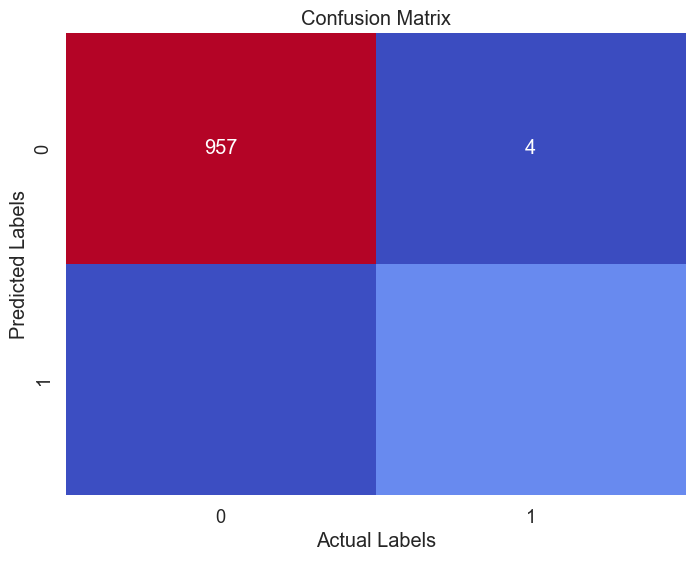

In [150]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

training['sms_message'] = training['sms_message'].astype(str)
test['sms_message'] = test['sms_message'].astype(str)

vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(training['sms_message'])
X_test = vectorizer.transform(test['sms_message'])

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, training['label_binary'])

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(test['label_binary'], y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(test['label_binary'], y_pred))

conf_matrix = confusion_matrix(test['label_binary'], y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Confusion Matrix')
plt.show()